## Observations and Insights: 
 1. My first observation is the Capomulin drug was very effective in reducing the tumor volume of the s185 mouse. According to the line plot below, the drug was able to reduce the tumor volume by at least 50%.
 2. Another observation is that the weight of the mouse and the tumor volume increase together. As the weight of the mouse increases, so does the tumor volume. So, there is a positive correlation between the weight and the tumor volume of the mice. The Pearson correlation coefficient of .84 edifies the high degree of correlation between the variables.
3. Last, I observed that of the top 2 Drug Regiments, Capomulin and Ramicane, Capomulin had less variability. Of the top 4 drug regiments, Infubibnol was the only drug regiment with an outlier in the lower bound.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on='Mouse ID')

# Display the data table for preview
combined_data.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
len(combined_data["Mouse ID"].unique())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset = ["Mouse ID", "Timepoint"])]
duplicate_mice


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data[combined_data["Mouse ID"] == "g989"]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(clean_data["Mouse ID"].unique())

248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

summary_table = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe()
summary_table = summary_table[["mean", "std"]]
summary_table["var"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
summary_table["median"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
summary_table["sem"] =  clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
summary_table = summary_table[["mean", "median","var", "std","sem"]]
summary_table



,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_aggregation = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

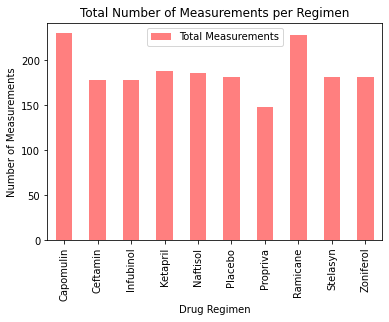

In [15]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimen_group = clean_data.groupby("Drug Regimen").count()
pandas_bar = regimen_group[["Mouse ID"]].rename(columns = {"Mouse ID":"Total Measurements"})
pandas_bar.plot(kind = "bar", alpha = .50, color=['red'])
plt.ylabel("Number of Measurements")
plt.title("Total Number of Measurements per Regimen")
plt.show()


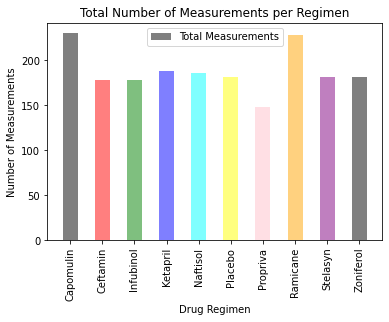

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group))
tick_locations = [x *1.7 for x in x_axis]
plt.bar(tick_locations, pandas_bar["Total Measurements"], alpha = .5, align = "center", label = "Total Measurements", color=['black', 'red', 'green', 'blue', 'cyan', 'yellow', 'pink', 'orange', 'purple', 'black'])
plt.xticks(tick_locations, regimen_group.index, rotation = "vertical")
plt.xlabel("Drug Regimen")
plt.title("Total Number of Measurements per Regimen")
plt.ylabel("Number of Measurements")
plt.legend(loc = "best")
plt.show()


<AxesSubplot:title={'center':'Male versus Female Distribution'}, ylabel='Total'>

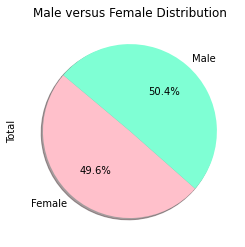

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_df = clean_data.drop_duplicates(subset = "Mouse ID").groupby("Sex").count()
sex_df = sex_df["Mouse ID"].to_frame().rename(columns ={ "Mouse ID" : "Total"})

colors = ["pink", "aquamarine"]
sex_df.plot(kind = "pie", y = "Total", title = "Male versus Female Distribution",autopct="%1.1f%%", shadow=True, startangle=140, colors = colors, legend = False)


Text(0.5, 1.0, 'Male versus Female Distribution')

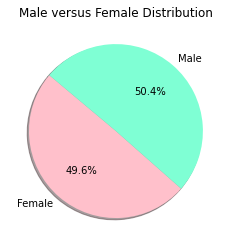

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
males = sex_df.loc["Male", "Total"]
females = sex_df.loc["Female", "Total"]

labels = sex_df.index
colors = ["pink", "aquamarine"]
sizes = [females, males]
plt.pie(sizes,labels=labels, colors = colors,
      autopct="%1.1f%%", shadow=True, startangle=140)
plt.title("Male versus Female Distribution")


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

copy_clean = pd.DataFrame.copy(clean_data)
final_four = clean_data.set_index("Drug Regimen").loc[["Capomulin","Ramicane", "Infubinol","Ceftamin"]].reset_index()

# Start by getting the last (greatest) timepoint for each mouse

final_four = final_four.groupby("Mouse ID")["Timepoint"].max()
final_four = pd.DataFrame(final_four).reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(copy_clean, final_four, on = ["Timepoint", "Mouse ID"])
merged_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
95,x822,Ceftamin,Male,3,29,45,61.386660,3
96,y163,Infubinol,Female,17,27,45,67.685569,3
97,y769,Ceftamin,Female,6,27,45,68.594745,4
98,y865,Ceftamin,Male,23,26,45,64.729837,3


In [22]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Ramicane", "Capomulin", "Ceftamin", "Infubinol"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = {}

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = merged_df["Tumor Volume (mm3)"].quantile([.25,.50,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
IQR = upperq - lowerq

print(f"The lower quartile of Tumor Volume (mm3) is {lowerq}.")
print(f"The upper quartile of Tumor Volume (mm3) is {upperq}.")
print(f"The Interquartile range of Tumor Volume (mm3) is {IQR}.")
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
for treatment in treatments:
    for index, row in merged_df.iterrows():
        if row["Drug Regimen"] == treatment:
            tumor_data_list.setdefault(treatment, []).append(row["Tumor Volume (mm3)"])
frame= pd.DataFrame(tumor_data_list)
    
    # Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*IQR)
upper_bound = upperq + (1.5*IQR)

print(f"Values below {lower_bound} could be outliers")
print(f"Values above {upper_bound} could be outliers")
    

The lower quartile of Tumor Volume (mm3) is 37.1877438025.
The upper quartile of Tumor Volume (mm3) is 59.930261755.
The Interquartile range of Tumor Volume (mm3) is 22.742517952499995.
Values below 3.0739668737500097 could be outliers
Values above 94.04403868374999 could be outliers


Text(0.5, 1.0, 'Variability of Top 4 Drug Regiments')

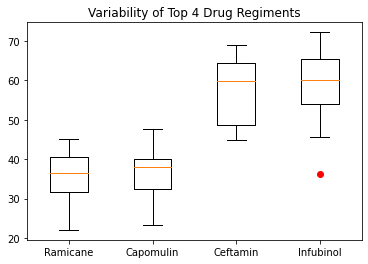

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([frame["Ramicane"], frame["Capomulin"], frame["Ceftamin"], frame["Infubinol"]], labels = treatments, sym = "r")
plt.title("Variability of Top 4 Drug Regiments")


## Line and Scatter Plots

[0, 5, 10, 15, 20, 25, 30, 35, 40, 45]

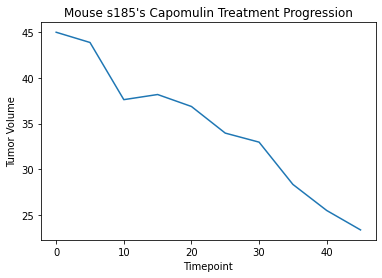

In [25]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
s185 = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].loc[clean_data["Mouse ID"] == "s185"]

lx_axis = s185["Timepoint"].tolist()
ly_axis = s185["Tumor Volume (mm3)"].tolist()
plt.plot(lx_axis, ly_axis)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Mouse s185's Capomulin Treatment Progression")
lx_axis


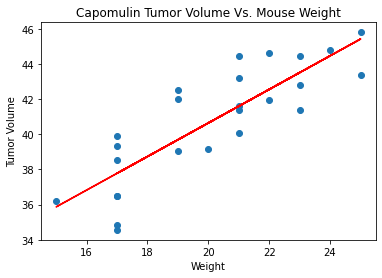

In [26]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_weight = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin"].groupby("Mouse ID").mean()
sx_axis = capomulin_weight["Weight (g)"]
sy_axis = capomulin_weight["Tumor Volume (mm3)"]

#add regression line from code in next cell to make the scatter plot pretty 
correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

plt.scatter(sx_axis,sy_axis)
plt.title("Capomulin Tumor Volume Vs. Mouse Weight")
plt.xlabel("Weight")
plt.ylabel("Tumor Volume")
plt.plot(sx_axis,regress_values, "r-")


## Correlation and Regression

In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(sx_axis,sy_axis)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(sx_axis, sy_axis)
regress_values = sx_axis * slope + intercept

print(f"The correlation between both factors is {round(correlation[0],2)}")
print(f"Linear Regressions Model: y = {round(slope, 2)}x + {round(intercept, 2)}")


The correlation between both factors is 0.84
Linear Regressions Model: y = 0.95x + 21.55
